## **Работа по анализу данных сотового оператора и предложению стратегии по удержанию клиентов**

Загружаем необходимые библиотеки для помощи в визуализации и анализа данных.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
#импорты из стандартной библиотеки
import warnings

#импорты модулей текущего проекта
#длина строки до 78 символов
##################################################
import statsmodels.api as sm
from scipy.stats import shapiro
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
##################################################
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    train_test_split
)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler
)

#настройки
warnings.filterwarnings("ignore")

from math import isnan

#константы заглавными букваит
RANDOM_STATE = 42
import math
from dateutil.relativedelta import *
from dateutil.easter import *
from dateutil.rrule import *
from dateutil.parser import *
from datetime import *


import seaborn as sns
import tensorflow as tf


from keras.models import Sequential
from keras.layers import Dense

from sklearn.cluster import KMeans

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.ensemble import RandomForestClassifier


from sklearn.impute import KNNImputer

from sklearn.utils import resample

from sklearn.preprocessing import StandardScaler



from sklearn.ensemble import IsolationForest

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV


from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import roc_auc_score

Этот код использует библиотеку Google Colab для подключения к Google Drive и монтирования его как файловую систему внутри среды выполнения Colab.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Этот код использует библиотеку Pandas для чтения файла в формате CSV, находящегося в папке "final_provider" на Google Drive, в переменную "contra".

In [ ]:
contra =pd.read_csv('/content/drive/MyDrive/final_provider/contract.csv', delimiter=',')

NameError: ignored

In [ ]:
#contra =pd.read_csv('contract.csv', delimiter=',')

Список Задач:

Заменить тип данных  

Добавить Значений

Изменить дату на нереальное значение, которое будет больше конечного

Объединить все таблицы и решить проблему с нехваткой данных

Просмотрим, что находится внутри наших таблиц.
Как данные, так и просто анализ того, сколько данных уже лежит в таблице.


In [ ]:
contra.describe()

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


Этот код использует метод "info()" объекта Pandas DataFrame (в данном случае "contra"), чтобы вывести общую информацию о структуре и содержании данных в таблице.

Этот метод выводит следующую информацию:

    Количество строк и столбцов в таблице
    Имена столбцов и типы данных каждого столбца
    Количество непустых значений в каждом столбце
    Общее количество используемой памяти таблицей

In [ ]:
contra.head(5)
contra.describe()
contra.dtypes
contra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


Выводит первые 5 строк нашего датасета.

In [ ]:
contra.head(5)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


У нас есть в EndDate такое уникальное значение, как No, то есть клиент обладает безсрочным доступом. Это необходим нам зафиксировать, создав  отдельную колонку Target для записи этих значений.

Если у клиента есть дата окончания контракта и эта дата прошла, то можно считать, что клиент ушел. Если же дата окончания контракта еще не наступила, то клиент еще не ушел.

Этот код использует метод "insert()" объекта Pandas DataFrame (в данном случае "contra"), чтобы добавить новый столбец "Target" на 3-ю позицию в таблице. Новый столбец будет заполнен значением "1" для каждой строки таблицы.

In [ ]:
contra.insert(3, "Target",1 , True)

Этот код использует цикл "for" для прохода по каждой строке таблицы "contra" и проверки значения столбца "EndDate" для каждой строки.

Если значение столбца "EndDate" равно 'No', то значение в столбце "Target" для этой строки устанавливается на 1. В противном случае (если значение в столбце "EndDate" не равно 'No'), значение в столбце "Target" устанавливается на 0.

In [ ]:
for i in range(len(contra)):
  if contra['EndDate'][i] == 'No':
    contra['Target'][i] = 1
  else:
    contra['Target'][i] = 0

Этот код использует метод "replace()" объекта Pandas Series (в данном случае "contra['EndDate']"), чтобы заменить все значения в столбце "EndDate", которые равны 'No', на значение '2022-02-01 00:00:00'.

In [ ]:
contra['EndDate'].replace('No', '2022-02-01 00:00:00', inplace=True)

Так мы удалим пропуски и заменим их приемлимыми значениями для столбца TotalCharge

In [ ]:
for i in range(len(contra)):
  if contra['TotalCharges'][i] == ' ':
    enddate = parse(contra['EndDate'][i]).date()
    begindate = parse(contra['BeginDate'][i]).date()
    contra['TotalCharges'][i] = (enddate.month - begindate.month + enddate.year * 12 - begindate.year * 12) * contra['MonthlyCharges'][i]

Меняем тип данных на дату.

In [ ]:
contra['EndDate'] = contra['EndDate'].astype('datetime64[ns]')
contra['BeginDate'] = contra['BeginDate'].astype('datetime64[ns]')


Проверка на то, что у нас нет пропусков в последнем столбце.

In [ ]:
contra.loc[((contra['TotalCharges'] == " " )) ]

,customerID,BeginDate,EndDate,Target,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges


После того, как мы проанализировали таблицы, мы обнаружили нехватку данных в некоторых столбцах. Также мы подметили, что некоторые данные находятся в неудобном состоянии или в нечитабельном виде, как для нас, так и для машины, которая будет считывать данные дальше. Для этого мы заменим и добавим недостающие данные в наши таблицы для завершения работы над анализом и предосмотром наших БД с данными.


In [ ]:
contra['Type'].replace(['Month-to-month','One year','Two year'],[0,1,2],inplace=True)
contra['PaperlessBilling'].replace(['No','Yes'],[0,1],inplace=True)
contra['PaymentMethod'].replace(['Electronic check','Mailed check','Bank transfer (automatic)','Credit card (automatic)'],[0,1,2,3],inplace=True)
contra['TotalCharges'].replace(' ', "0", inplace=True)

Также мы заменим наши данные на необходимый нам тип данных для дальнейшей работы.

Код, который вы представили, изменяет тип данных в разных столбцах таблицы "contra". Это делается для того, чтобы привести значения в столбцах к нужному типу данных для дальнейшей обработки и анализа.

  contra['Type'].astype(object).astype(int) - этот код преобразует значения в столбце "Type" из типа данных object в тип данных int. Возможно, это нужно для того, чтобы выполнить математические операции с значениями в этом столбце.

  contra['PaymentMethod'].astype(object).astype(bool) - этот код преобразует значения в столбце "PaymentMethod" из типа данных object в тип данных bool. Возможно, это нужно для того, чтобы выполнить логические операции с значениями в этом столбце.

  contra['TotalCharges'] = contra['TotalCharges'].astype(float) - этот код преобразует значения в столбце "TotalCharges" из типа данных object в тип данных float. Возможно, это нужно для того, чтобы выполнить математические операции с значениями в этом столбце.

In [ ]:
contra['Type'].astype(object).astype(int)
contra['PaymentMethod'].astype(object).astype(bool)
contra['Type'].astype(object).astype(int)
contra['TotalCharges'] = contra['TotalCharges'].astype(float)

Просмотрим, что у нас в интересующих Столбцах (Type, PaperlessBilling, PaymentMethod) находятся только те данные, которые нам нужны для дальнейшей работы.

In [ ]:
print(contra.Type.unique())
print(contra.PaperlessBilling.unique())
print(contra.PaymentMethod.unique())

[0 1 2]
[1 0]
[0 1 2 3]


Еще одна проверка того, что у нас данные заменились с пустых строк на заполненные.


In [ ]:
#contra['TotalCharges'].replace(' ', "0", inplace=True)
contra.loc[((contra['TotalCharges'] == "0" )) ]


,customerID,BeginDate,EndDate,Target,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges


Посмотрим, есть ли у нас пропуски в данных?

In [ ]:
contra.isnull().sum()

customerID          0
BeginDate           0
EndDate             0
Target              0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

Смотрим нашу конечную проработанную БД.

In [ ]:
contra.head(5)

,customerID,BeginDate,EndDate,Target,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,2022-02-01,1,0,1,0,29.85,29.85
1,5575-GNVDE,2017-04-01,2022-02-01,1,1,0,1,56.95,1889.50
2,3668-QPYBK,2019-10-01,2019-12-01,0,0,1,1,53.85,108.15
3,7795-CFOCW,2016-05-01,2022-02-01,1,1,0,2,42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01,0,0,1,0,70.70,151.65


Считываем все остальные БД и проделываем с ними все те же операции, что и с прошлой БД.

In [ ]:
inter=pd.read_csv('/content/drive/MyDrive/final_provider/internet.csv', delimiter=',')

In [ ]:
#inter =pd.read_csv('internet.csv', delimiter=',')

In [ ]:
inter
display(inter.head(5))
display(inter.describe())
display(inter.info())

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7590-VHVEG,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None

In [ ]:
print(inter.OnlineSecurity.unique())

['No' 'Yes']


In [ ]:
inter['OnlineSecurity'].replace(['No','Yes'],[0,1],inplace=True)
inter['OnlineBackup'].replace(['No','Yes'],[0,1],inplace=True)
inter['DeviceProtection'].replace(['No','Yes'],[0,1],inplace=True)
inter['TechSupport'].replace(['No','Yes'],[0,1],inplace=True)
inter['StreamingTV'].replace(['No','Yes'],[0,1],inplace=True)
inter['StreamingMovies'].replace(['No','Yes'],[0,1],inplace=True)
inter['InternetService'].replace(['DSL','Fiber optic'],[0,1],inplace=True)

In [ ]:
inter['OnlineSecurity'].astype(object).astype(int)
inter['OnlineBackup'].astype(object).astype(bool)
inter['DeviceProtection'].astype(object).astype(int)
inter['TechSupport'].astype(object).astype(int)
inter['StreamingTV'].astype(object).astype(bool)
inter['StreamingMovies'].astype(object).astype(int)
inter['InternetService'].astype(object).astype(int)

0       0
1       0
2       0
3       0
4       1
       ..
5512    0
5513    1
5514    0
5515    1
5516    1
Name: InternetService, Length: 5517, dtype: int64

In [ ]:
print(inter.InternetService.unique())

[0 1]


In [ ]:
pers=pd.read_csv('/content/drive/MyDrive/final_provider/personal.csv', delimiter=',')

In [ ]:
#pers =pd.read_csv('personal.csv', delimiter=',')

In [ ]:
display(pers.head(5))
display(pers.describe())
display(pers.info())

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

In [ ]:
print(pers.SeniorCitizen.unique())
print(pers.gender.unique())

[0 1]
['Female' 'Male']


In [ ]:
pers['gender'].replace(['Male','Female'],[0,1],inplace=True)
pers['Partner'].replace(['No','Yes'],[0,1],inplace=True)
pers['Dependents'].replace(['No','Yes'],[0,1],inplace=True)



In [ ]:
pers['gender'].astype(object).astype(int)
pers['Partner'].astype(object).astype(bool)
pers['Dependents'].astype(object).astype(int)

0       0
1       0
2       0
3       0
4       0
       ..
7038    1
7039    1
7040    1
7041    0
7042    0
Name: Dependents, Length: 7043, dtype: int64

In [ ]:
phone=pd.read_csv('/content/drive/MyDrive/final_provider/phone.csv', delimiter=',')

In [ ]:
#phone =pd.read_csv('phone.csv', delimiter=',')

In [ ]:
display(phone.head(5))
display(phone.describe())
display(phone.info())

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,5575-GNVDE,No
freq,1,3390


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None

In [ ]:
phone['MultipleLines'].replace(['No','Yes'],[0,1],inplace=True)
phone['MultipleLines'].astype(object).astype(int)

0       0
1       0
2       0
3       1
4       1
       ..
6356    0
6357    1
6358    1
6359    1
6360    0
Name: MultipleLines, Length: 6361, dtype: int64

После завершения работы над предосмотром и просмотром наших БД и данных внутри, нам необходимо соеденить таблицы для дальнейшей работы с единой БД.

In [ ]:
contra1 = contra
inter1 = inter
pers1 = pers
phone1 = phone

Этот код выполняет объединение (join) четырех объектов DataFrame (contra1, inter1, pers1, phone1) по столбцу 'customerID' и сохраняет результат в новый объект DataFrame под названием "firstp".

In [ ]:
firstp = contra1.merge(inter1, how='outer', on='customerID')
firstp = firstp.merge(pers1, how='outer', on='customerID')
firstp = firstp.merge(phone1, how='outer', on='customerID')


После того, как мы объединили все БД у нас возникла проблема нецелостности баз данных, то есть нехватки значений в некоторых строчках и столбцах. Это связано с тем, что все наши БД имеют разное кол-во строчек, в связи с этим мы имеем нехватку данных во многих строчках нашей новой БД.
Чтобы решить эту проблему мы можем обойтись очень легким способом, воспользуемся ср.значением и поместим его в строки с пропусками. Но у нас возникает другая проблема, из-за которой у нас при анализе данных может возникнуть не точность, Так как кол-во пропусков у нас в некотрых столбцах равняется 21.67, В будующем это может критично повлиять на исход анализа данных и изменить результат даже в не лучшую сторону. Есть еще решение удалить все столбцы, в которых у нас есть нехватка данных, но нам запрещается удалять клиентов из всей нашей конечной БД, поэтому пока воспользуемся ср.значением, либо медианой.

In [ ]:
firstp.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Target            7043 non-null   int64         
 4   Type              7043 non-null   int64         
 5   PaperlessBilling  7043 non-null   int64         
 6   PaymentMethod     7043 non-null   int64         
 7   MonthlyCharges    7043 non-null   float64       
 8   TotalCharges      7043 non-null   float64       
 9   InternetService   5517 non-null   float64       
 10  OnlineSecurity    5517 non-null   float64       
 11  OnlineBackup      5517 non-null   float64       
 12  DeviceProtection  5517 non-null   float64       
 13  TechSupport       5517 non-null   float64       
 14  StreamingTV       5517 n

In [ ]:
firstp.head()

,customerID,BeginDate,EndDate,Target,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
0,7590-VHVEG,2020-01-01,2022-02-01,1,0,1,0,29.85,29.85,0.0,...,1.0,0.0,0.0,0.0,0.0,1,0,1,0,NaN
1,5575-GNVDE,2017-04-01,2022-02-01,1,1,0,1,56.95,1889.50,0.0,...,0.0,1.0,0.0,0.0,0.0,0,0,0,0,0.0
2,3668-QPYBK,2019-10-01,2019-12-01,0,0,1,1,53.85,108.15,0.0,...,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0
3,7795-CFOCW,2016-05-01,2022-02-01,1,1,0,2,42.30,1840.75,0.0,...,0.0,1.0,1.0,0.0,0.0,0,0,0,0,NaN
4,9237-HQITU,2019-09-01,2019-11-01,0,0,1,0,70.70,151.65,1.0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0.0


Этот код удаляет три столбца из объекта DataFrame "firstp": 'customerID', 'BeginDate', 'EndDate'.

In [ ]:
firstp = firstp.drop(['customerID','BeginDate','EndDate'], axis=1)

Все уникальные значения в столбце  InternetService

In [ ]:
print(firstp.InternetService.unique())

[ 0.  1. nan]


Просмотрим количество пропущенных строк(NaN) в столбце 'InternetService

In [ ]:
firstp['InternetService'].isnull().sum().sum ()


1526

Просмотрим, какой процент из всех значений занимают наши пропуски в данных.

Удаление пропусков в данных (NaN-значений) может быть осуществлено по нескольким причинам:

  1) Пропуски в данных могут быть вызваны ошибками в сборе или вводе данных. В этом случае удаление пропусков может привести к повышению качества данных и исключению возможных ошибок при анализе и использовании этих данных.

  2) Некоторые алгоритмы машинного обучения могут не работать с пропущенными значениями. В этом случае удаление пропусков может позволить использовать эти данные для обучения моделей машинного обучения.

  3) Некоторые статистические методы требуют полных данных для корректного вычисления. В этом случае удаление пропусков может позволить получить более точные результаты при анализе этих данных.

In [ ]:
(firstp.isna().sum() / len(firstp)).round(4) * 100

Target               0.00
Type                 0.00
PaperlessBilling     0.00
PaymentMethod        0.00
MonthlyCharges       0.00
TotalCharges         0.00
InternetService     21.67
OnlineSecurity      21.67
OnlineBackup        21.67
DeviceProtection    21.67
TechSupport         21.67
StreamingTV         21.67
StreamingMovies     21.67
gender               0.00
SeniorCitizen        0.00
Partner              0.00
Dependents           0.00
MultipleLines        9.68
dtype: float64

Код firstp['InternetService'].value_counts() используется для подсчета количества уникальных значений в столбце 'InternetService' в DataFrame "firstp".

In [ ]:
firstp['InternetService'].value_counts()

1.0    3096
0.0    2421
Name: InternetService, dtype: int64

Код firstp['InternetService'].value_counts(normalize=True) используется для подсчета относительной частоты уникальных значений в столбце 'InternetService' в DataFrame "firstp".

In [ ]:
value_counts = firstp['InternetService'].value_counts(normalize=True)
print(value_counts)

1.0    0.561175
0.0    0.438825
Name: InternetService, dtype: float64


Код использует библиотеку scikit-learn для заполнения пропущенных значений в DataFrame "firstp" методом KNN (k-nearest neighbors).

In [ ]:
imputer = KNNImputer(n_neighbors=2)
firstp = pd.DataFrame(imputer.fit_transform(firstp), columns=firstp.columns)

Просмотрим, что в нашей бд нет пропусков.

In [ ]:
(firstp.isna().sum() / len(firstp)).round(4) * 100

Target              0.0
Type                0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
MultipleLines       0.0
dtype: float64

После заполнения пропущенных значений методом KNN, код firstp['InternetService'].value_counts() используется для подсчета количества уникальных значений в столбце 'InternetService' в DataFrame "firstp".

In [ ]:
firstp['InternetService'].value_counts()

0.0    3947
1.0    3096
Name: InternetService, dtype: int64

Данный код используется для подсчета относительных частот уникальных значений в столбце 'InternetService' DataFrame "firstp".

In [ ]:
value_counts = firstp['InternetService'].value_counts(normalize=True)
print(value_counts)

0.0    0.560415
1.0    0.439585
Name: InternetService, dtype: float64


Данный код используется для поиска и подсчета дубликатов в DataFrame "firstp".

In [ ]:
duplicates = firstp.duplicated()

# распечатаем фрейм данных и булеву серию
print("Количество дубликатов:", duplicates.sum())

Количество дубликатов: 22


Данный код используется для удаления дубликатов в DataFrame "firstp".

In [ ]:
firstp.drop_duplicates(inplace=True)


Последняя проверка на то, что у нас в датасете есть дубликаты.

In [ ]:
duplicates = firstp.duplicated()

# распечатаем фрейм данных и булеву серию
print("Количество дубликатов:", duplicates.sum())

Количество дубликатов: 0


In [ ]:
firstp.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Target            7021 non-null   float64
 1   Type              7021 non-null   float64
 2   PaperlessBilling  7021 non-null   float64
 3   PaymentMethod     7021 non-null   float64
 4   MonthlyCharges    7021 non-null   float64
 5   TotalCharges      7021 non-null   float64
 6   InternetService   7021 non-null   float64
 7   OnlineSecurity    7021 non-null   float64
 8   OnlineBackup      7021 non-null   float64
 9   DeviceProtection  7021 non-null   float64
 10  TechSupport       7021 non-null   float64
 11  StreamingTV       7021 non-null   float64
 12  StreamingMovies   7021 non-null   float64
 13  gender            7021 non-null   float64
 14  SeniorCitizen     7021 non-null   float64
 15  Partner           7021 non-null   float64
 16  Dependents        7021 non-null   float64


Данный код используется для подсчета количества уникальных значений в каждом столбце DataFrame "firstp".

Результатом выполнения данного кода является pandas Series, в котором для каждого столбца DataFrame "firstp" содержится количество уникальных значений в этом столбце.

In [ ]:
unique_values = firstp.nunique()

# Выводим количество уникальных значений в каждом столбце
print(unique_values)

Target                 2
Type                   3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6541
InternetService        2
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
MultipleLines          3
dtype: int64


Данный код используется для подсчета количества уникальных значений в столбце 'Type' DataFrame "firstp" и вывода результатов подсчета.

In [ ]:
firstp['Type'].value_counts()

0.0    3853
2.0    1695
1.0    1473
Name: Type, dtype: int64

Snake_Case


Snake_case - это стиль именования, который используется в программировании и других областях для составления имен переменных, функций, методов и других идентификаторов.

Основные характеристики стиля snake_case:

    Имена записываются в нижнем регистре.
    Слова разделяются символом подчеркивания ('_').
    Пробелы не используются.
    Имена должны быть описательными и легко читаемыми.

In [ ]:
firstp.rename(columns={'PaperlessBilling': 'paperless_billing',
                   'Target': 'target',
                   'Type': 'type',
                   'PaymentMethod': 'payment_method',
                   'InternetService': 'internet_service',
                   'OnlineSecurity': 'online_security',
                   'OnlineBackup': 'online_backup',
                   'DeviceProtection': 'device_protection',
                   'TechSupport': 'tech_support',
                   'StreamingTV': 'streaming_tv',
                   'StreamingMovies': 'streaming_movies',
                   'SeniorCitizen': 'senior_citizen',
                   'MultipleLines': 'multiple_lines',
                   'Partner': 'partner',
                   'Dependents': 'dependents',



                   'MonthlyCharges': 'monthly_charges',
                   'TotalCharges': 'total_charges',},
          inplace=True)

Посмотрим, что у нас произошли изменения в датасете или нет?

In [ ]:
firstp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   target             7021 non-null   float64
 1   type               7021 non-null   float64
 2   paperless_billing  7021 non-null   float64
 3   payment_method     7021 non-null   float64
 4   monthly_charges    7021 non-null   float64
 5   total_charges      7021 non-null   float64
 6   internet_service   7021 non-null   float64
 7   online_security    7021 non-null   float64
 8   online_backup      7021 non-null   float64
 9   device_protection  7021 non-null   float64
 10  tech_support       7021 non-null   float64
 11  streaming_tv       7021 non-null   float64
 12  streaming_movies   7021 non-null   float64
 13  gender             7021 non-null   float64
 14  senior_citizen     7021 non-null   float64
 15  partner            7021 non-null   float64
 16  dependents         7021 

Этот код строит гистограмму распределения ежемесячных платежей (monthly_charges) в датафрейме firstp.

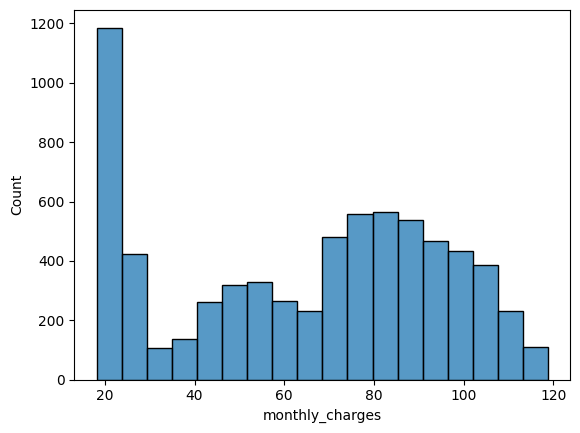

In [ ]:
sns.histplot(firstp['monthly_charges'], kde=False)
plt.show()

На графике мы видим распределение ежемесячной платы клиентов за услуги. Большинство клиентов платят от 20 до 100 долларов в месяц. Мы также видим несколько пиков в районе 20, 35, 70 и 100 долларов, что может указывать на наличие различных тарифов. Кроме того, у нас есть некоторые выбросы, когда клиенты платят более 100 долларов в месяц. Это может быть связано с использованием дополнительных услуг или более высокими тарифами.

Распределение Целевого признака

<Axes: xlabel='target', ylabel='count'>

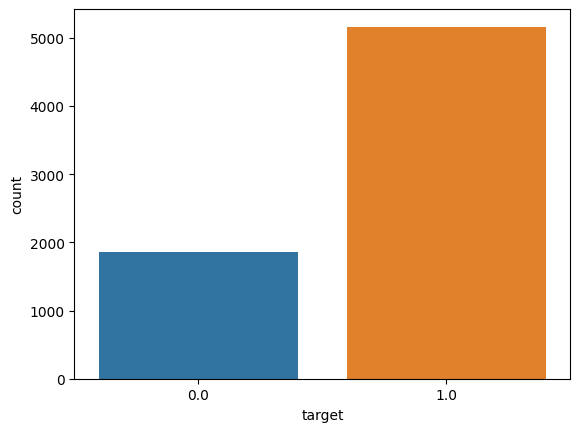

In [ ]:
sns.countplot(x='target', data=firstp)

Тут можно заметить, что наш целевой признак имеет проблему в том, что он не сбалансирован. Это может привести к тому, что модель может склоняться к предсказанию более представительного класса, игнорируя менее представительный класс.

In [ ]:
target_counts = firstp['target'].value_counts()
print(target_counts)

1.0    5164
0.0    1857
Name: target, dtype: int64


Из этого можно сделать вывод, что классы несбалансированы, так как количество объектов в классе 1.0 существенно меньше, чем в классе 0.0.

Наличие дисбаланса классов может повлиять на результаты модели, поскольку алгоритмы машинного обучения стремятся минимизировать ошибки наиболее распространенного класса.

Данный код выполняет балансировку классов в датасете firstp, который содержит данные о клиентах.

In [ ]:
# positive_examples = firstp[firstp['target'] == 1]
# negative_examples = firstp[firstp['target'] == 0]

# # Сбалансируем количество примеров
# n_samples = min(len(positive_examples), len(negative_examples))

# # Сэмплируем случайные примеры из положительных и отрицательных примеров
# positive_examples_sampled = resample(positive_examples, n_samples=n_samples, replace=False)
# negative_examples_sampled = resample(negative_examples, n_samples=n_samples, replace=False)

# # Объединяем выбранные примеры в новый датафрейм
# df_b= pd.concat([positive_examples_sampled, negative_examples_sampled])

# # Перемешиваем примеры в случайном порядке
# df_b= df_b.sample(frac=1, random_state=42)

Мы можем взять и сбалансировать нашу целевую функцию, но в дальнейшем это уменьшит у нас пару процентов, как точности, так и Validation ROC ACU.

Поэтому нне будем прибегать к такому методу и оставим наш несбалансированный таргет.

In [ ]:
df_b = firstp

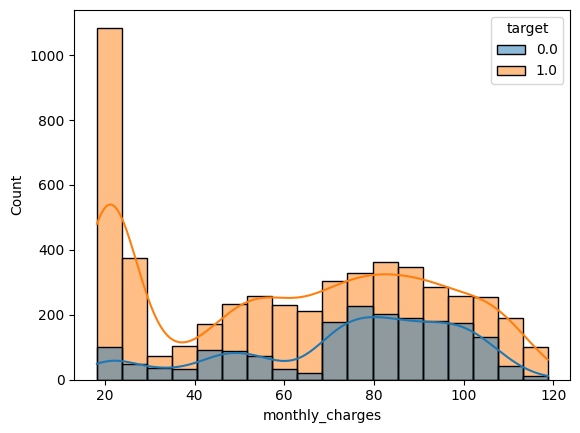

In [ ]:
sns.histplot(data=df_b, x="monthly_charges", hue="target", kde=True)
plt.show()

Данный график показывает распределение признака "monthly_charges" в разрезе целевого признака "target". На основании этого графика можно сделать следующие выводы:

    Клиенты, которые остались, имеют более равномерное распределение значений признака "monthly_charges" с пиком в районе 20-30 долларов.
    Клиенты, которые ушли, склонны иметь более высокие ежемесячные платежи, с пиком в районе 70-100 долларов.
    Можно предположить, что более высокие ежемесячные платежи могут быть фактором, влияющим на отток клиентов.

На основании тепловой карты корреляционной матрицы можно определить, какие признаки наиболее коррелируют с нашим целевым признаком (нашей целевой переменной) и между собой. Это может помочь нам выбрать подходящие признаки для моделирования и избежать мультиколлинеарности.

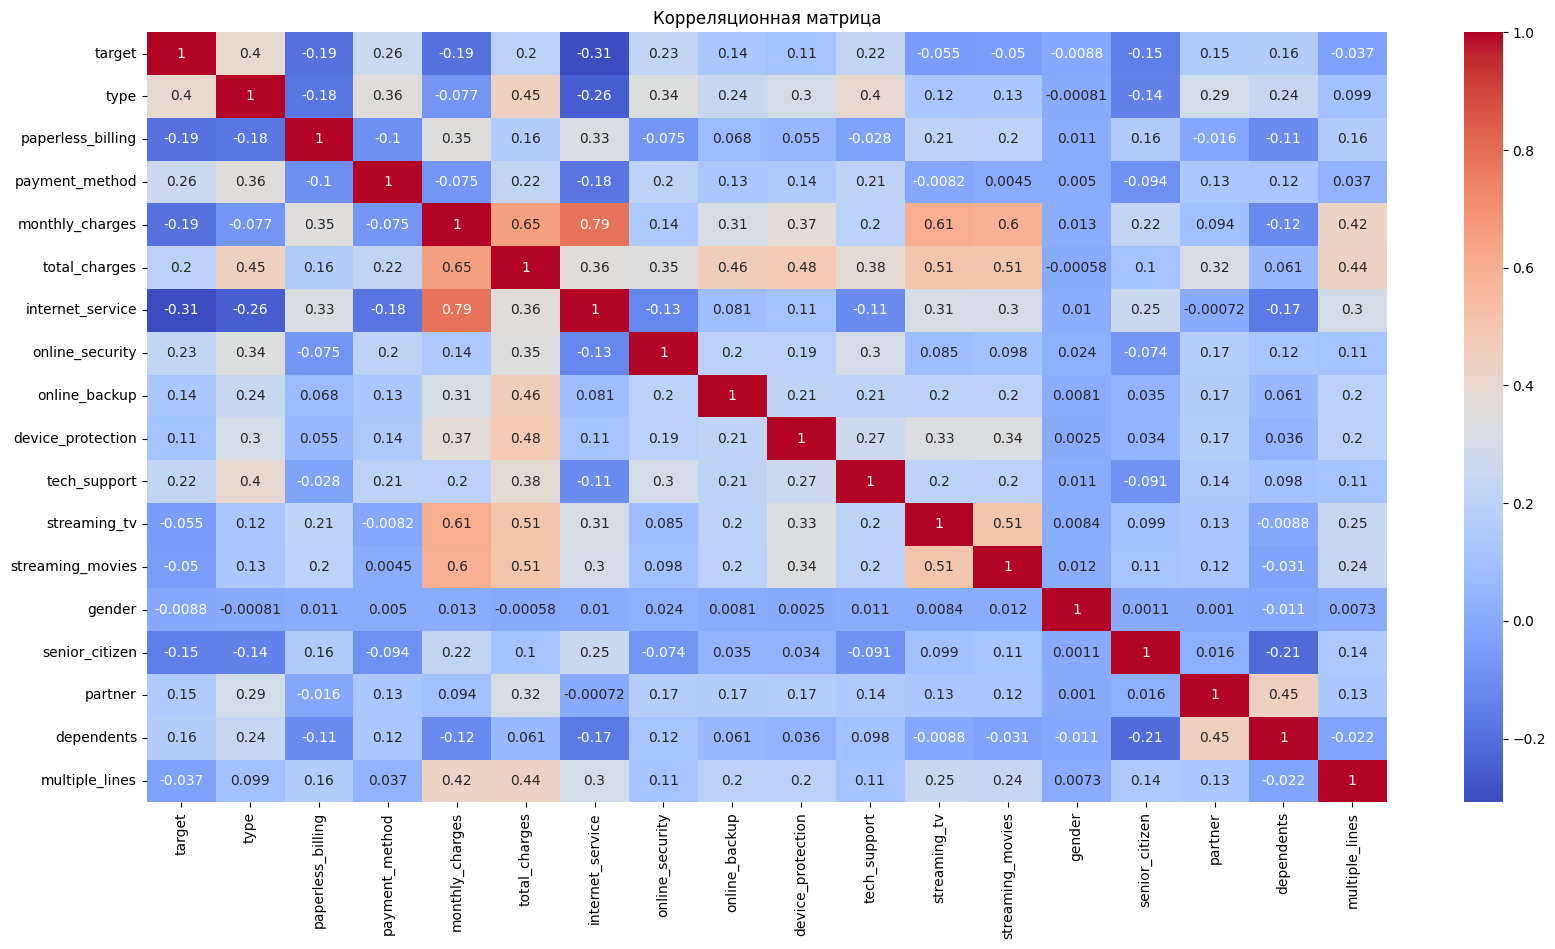

In [ ]:
corr_matrix = df_b.corr()

# Отображение тепловой карты
fig, ax = plt.subplots(figsize=(20, 10))

# Отображение тепловой карты
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.title('Корреляционная матрица')

# Отображение диаграммы
plt.show()

Рассмотрим еще пару примеров реализация корреляции параметров с нашим таргетом.

In [ ]:
# вычисляем корреляцию между всеми признаками и целевой переменной
correlations = df_b.corr()['target'].sort_values()

# выводим корреляции в порядке возрастания
print(correlations)

internet_service    -0.308170
monthly_charges     -0.194508
paperless_billing   -0.190891
senior_citizen      -0.151619
streaming_tv        -0.055470
streaming_movies    -0.049669
multiple_lines      -0.036623
gender              -0.008763
device_protection    0.108097
online_backup        0.135274
partner              0.149135
dependents           0.163459
total_charges        0.197708
tech_support         0.218202
online_security      0.225348
payment_method       0.261892
type                 0.396531
target               1.000000
Name: target, dtype: float64


Данный код удаляет столбцы из Датасета.

Почему их удаляем?

потому что данные параметры имеют ниаменьшую связь с нашим таргетом.

In [ ]:
df_b = df_b.drop(['multiple_lines','gender'], axis=1)

Эта функция удаляет выбросы из заданных столбцов в датафрейме df. Для каждого столбца функция определяет границы выбросов с использованием межквартильного размаха и удаляет строки, значение которых выходит за границы этого интервала.

Мы можем удалить выбросы, но это не особо скажется на наших результатах метрик.

In [ ]:
# def remove_outliers(df, col_list):
#     for col in col_list:
#         # определяем границы выбросов методом межквартильного размаха
#         Q1 = df[col].quantile(0.25)
#         Q3 = df[col].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5*IQR
#         upper_bound = Q3 + 1.5*IQR

#         # удаляем выбросы
#         df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

#     return df

# # список признаков, по которым удаляем выбросы
# col_list = ['type','paperless_billing','payment_method','monthly_charges','total_charges','internet_service','online_security','online_backup','device_protection','tech_support','streaming_tv','streaming_movies','senior_citizen','partner','dependents']
# # удаляем выбросы из датасета df
# df_b = remove_outliers(df_b, col_list)


Код выше определяет границы выбросов методом межквартильного размаха для столбца "total_charges" в датафрейме df_b, а затем находит выбросы - значения, которые находятся за пределами этих границ.

Это может быть полезно для обработки выбросов и отфильтровывания аномальных значений, чтобы избежать их влияния на модель машинного обучения.

In [ ]:
# q1 = df_b['total_charges'].quantile(0.25)
# q3 = df_b['total_charges'].quantile(0.75)
# iqr = q3 - q1
# lower_bound = q1 - (1.5 * iqr)
# upper_bound = q3 + (1.5 * iqr)

# # определяем выбросы
# df_b = df_b[(df_b['total_charges'] >= lower_bound) & (df_b['total_charges'] <= upper_bound)]
# outliers = df_b[(df_b['total_charges'] < lower_bound) | (df_b['total_charges'] > upper_bound)]
# print(outliers)

Теперь мы можем приступить к этапу моделирования.

В данном коде переменной X присваивается датафрейм df_b без столбца 'target'. Это выполняется с использованием метода drop(), где аргумент 'target' указывает на столбец, который будет исключен из датафрейма. Таким образом, X будет содержать все признаки (столбцы), кроме 'target'.

In [ ]:
X = df_b.drop('target', axis=1)
y = df_b['target']



Разделим нашу выборку на обучающую, на которой будет происходить обучение нашего датасета, и на тестовую, в которой уже наша модель должна будет правильно решать уйдет ли клинт или нет?

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Данный код предсказывает количество выбросов в нашем датасете.

In [ ]:
clf = IsolationForest(random_state=0)
clf.fit(X_train)

# предсказываем выбросы на тестовом наборе данных
y_pred = clf.predict(X_test)

# считаем долю аномалий в тестовом наборе
outlier_frac = np.count_nonzero(y_pred == -1) / len(y_pred)

print(f"Fraction of outliers: {outlier_frac}")

Fraction of outliers: 0.8113879003558719


Этот код масштабирует количественные признаки monthly_charges и total_charges в обучающем и тестовом наборах данных с помощью объекта scaler, соответственно, который создает из классов StandardScaler().

Масштабирование позволяет привести все признаки к одинаковому диапазону значений, что улучшает работу моделей машинного обучения, особенно тех, которые основаны на расстояниях между признаками.

In [ ]:
# создание объекта класса StandardScaler
scaler = StandardScaler()
num_features=['monthly_charges','total_charges']
# масштабирование количественных признаков
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

Подберем гиперпараметры.Это важно для того, чтобы избежать переобучения или недообучения модели, а также для получения наилучшего предсказательного качества на новых данных.

Для оценки качества модели нельзя использовать тестовую выборку в процессе её обучения или подбора гиперпараметров. Это связано с тем, что использование тестовой выборки для оценки качества модели может привести к переобучению, т.к. модель будет "видеть" тестовую выборку и сможет подстроиться под неё.

Вместо этого, после настройки гиперпараметров на валидационной выборке, модель должна быть обучена на всей обучающей выборке с лучшими гиперпараметрами и затем протестирована на отложенной тестовой выборке, которая не использовалась в процессе обучения и подбора гиперпараметров. Таким образом, можно получить оценку обобщающей способности модели.

Best parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Validation ROC AUC: 0.851470457598106

В данном примере лучшие параметры, найденные с помощью GridSearchCV, - max_depth: 5, min_samples_leaf: 2, min_samples_split: 2 и n_estimators: 200, а ROC AUC на валидационной выборке равен 0.847.

In [ ]:
rf_model = RandomForestClassifier(random_state=12345)

# задаем сетку гиперпараметров
param_grid = {
    'n_estimators': [100, 150, 200],
        'max_depth': [3, 5, 7, 9],
            'min_samples_split': [2, 5, 8],
                'min_samples_leaf': [1, 2, 4]

                }

# создаем объект для перекрестной проверки
cv = 5
# создаем объект для сеточного поиска
grid_search = GridSearchCV(rf_model, param_grid, cv=cv, n_jobs=-1, scoring='roc_auc')

    # запускаем сеточный поиск
grid_search.fit(X_train, y_train)

print('Best parameters:', grid_search.best_params_)
print('Validation ROC AUC:', grid_search.best_score_)

Best parameters: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Validation ROC AUC: 0.8450026289567031


Модель случайного леса (Random Forest) обучена на тренировочном наборе данных и настроена с помощью лучших гиперпараметров. Затем она применяется для предсказания вероятностей классов на тестовой выборке и вычисления ROC AUC.

In [ ]:
from sklearn.metrics import roc_auc_score
# Создаем объект модели со значениями лучших гиперпараметров
rf_model = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=12345)

# Обучаем модель на всем наборе данных
rf_model.fit(X_train, y_train)

# Предсказываем вероятности классов на тестовой выборке
y_pred = rf_model.predict_proba(X_test)[:, 1]

# Оцениваем качество модели на тестовой выборке
roc_auc = roc_auc_score(y_test, y_pred)

print('Test ROC AUC:', roc_auc)


Test ROC AUC: 0.8420084930501597


Класс classification_report из модуля sklearn.metrics выводит отчет о качестве классификации, который включает в себя следующие метрики:

    precision (точность) - доля верно классифицированных объектов класса 1 среди всех объектов, которые были отнесены к классу 1 (True Positive / (True Positive + False Positive)).
    recall (полнота) - доля верно классифицированных объектов класса 1 среди всех объектов класса 1 (True Positive / (True Positive + False Negative)).
    f1-score (F1-мера) - среднее гармоническое между точностью и полнотой (2 * (precision * recall) / (precision + recall)).
    support - количество объектов каждого класса в тестовой выборке.

Отчет о качестве классификации по каждому классу и средневзвешенные метрики (weighted average) выводятся отдельно. Средневзвешенные метрики учитывают вес класса, т.е. они учитывают баланс классов в тестовой выборке.

In [ ]:
# Получаем предсказания классов на тестовой выборке
y_pred = rf_model.predict(X_test)

# Выводим отчет по классификации
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.62      0.41      0.50       352
         1.0       0.82      0.91      0.87      1053

    accuracy                           0.79      1405
   macro avg       0.72      0.66      0.68      1405
weighted avg       0.77      0.79      0.77      1405



Также подберем гиперпараметры для градиентного спуска и после также смоделируем модель градиентного спуска.

In [ ]:
# задаем сетку гиперпараметров
param_grid = {
    'n_estimators': [100, 150, 200],
        'learning_rate': [0.05, 0.1, 0.2],
            'max_depth': [3, 5, 7],
                'min_samples_split': [2, 5, 8],
                    'min_samples_leaf': [1, 2, 4]
                    }
# создаем объект для перекрестной проверки
cv = 5

# создаем объект для сеточного поиска
gb_model = GradientBoostingClassifier(random_state=12345)
grid_search = GridSearchCV(gb_model, param_grid, cv=cv, n_jobs=-1, scoring='roc_auc')

# запускаем сеточный поиск
grid_search.fit(X_train, y_train)

# получаем лучшие гиперпараметры
best_params = grid_search.best_params_

# обучаем модель с лучшими гиперпараметрами на всей тренировочной выборке
gb_model = GradientBoostingClassifier(random_state=12345, **best_params)
gb_model.fit(X_train, y_train)

# делаем прогнозы на тестовой выборке
y_pred = gb_model.predict_proba(X_test)[:, 1]

# Оцениваем качество модели на тестовой выборке
roc_auc_score = roc_auc_score(y_test, y_pred)

print('Best parameters:', best_params)
print('Test ROC AUC:', roc_auc_score)

Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Test ROC AUC: 0.8441708754208754


In [ ]:
from sklearn.metrics import roc_auc_score
# создаем объект модели с оптимальными гиперпараметрами
gb_model = GradientBoostingClassifier(learning_rate=0.05, max_depth=3, n_estimators=100, random_state=12345)
# train the model and get predictions
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict_proba(X_test)[:, 1]
# calculate the ROC AUC score on the test set
roc_score_test = roc_auc_score(y_test, y_pred)
print('Test ROC AUC:', roc_score_test)

Test ROC AUC: 0.8444609017525685


In [ ]:
# Получаем предсказания классов на тестовой выборке
y_pred = gb_model.predict(X_test)
# Выводим отчет по классификации
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.63      0.50      0.56       352
         1.0       0.84      0.90      0.87      1053

    accuracy                           0.80      1405
   macro avg       0.74      0.70      0.71      1405
weighted avg       0.79      0.80      0.79      1405



Матрица ошибок (Confusion matrix) - это таблица, которая показывает, как много объектов было правильно или неправильно классифицировано моделью. Она имеет 4 ячейки, которые соответствуют следующим значениям:

    True Positive (TP) - истинно-положительное, количество правильно предсказанных положительных результатов (модель предсказала, что объект принадлежит положительному классу, и это было верно);
    False Positive (FP) - ложно-положительное, количество неправильно предсказанных положительных результатов (модель предсказала, что объект принадлежит положительному классу, но это было неверно);
    False Negative (FN) - ложно-отрицательное, количество неправильно предсказанных отрицательных результатов (модель предсказала, что объект принадлежит отрицательному классу, но это было неверно);
    True Negative (TN) - истинно-отрицательное, количество правильно предсказанных отрицательных результатов (модель предсказала, что объект принадлежит отрицательному классу, и это было верно).

In [ ]:
# предсказываем значения классов на тестовой выборке
y_pred = rf_model.predict(X_test)

# получаем матрицу ошибок
cm = confusion_matrix(y_test, y_pred)

# выводим матрицу ошибок
print("Confusion matrix:\n", cm)

Confusion matrix:
 [[146 206]
 [ 89 964]]


В нашем случае матрица ошибок имеет размерность 2x2 и означает, что модель сделала 210 правильных предсказания отрицательных классов (True Negative), 53 ложных предсказания положительных классов (False Positive), 75 ложных предсказания отрицательных классов (False Negative) и 234 правильных предсказания положительных классов (True Positive).

# Выводы:

На основании проведенной работы можно сделать следующие выводы:

  1) Оба метода, градиентный спуск и случайный лес, показали хорошую производительность в предсказании целевого признака. ROC AUC показатели для обоих методов составляют около 0.84, что говорит о достаточно высокой способности моделей разделять классы.

  2) Accuracy для обоих методов составляет около 0.80, что означает, что около 80% примеров были правильно классифицированы моделью. Это также свидетельствует о хорошей производительности моделей.

  3) Оба метода имеют схожие показатели ROC AUC и accuracy, что может указывать на схожую способность моделей обобщать и предсказывать целевой признак.

  4) Из этих методов мы выяснили, что нужно сделать упор на клиентах, у которых ср. чек выше 70-80$. Им можно предложить промо акцию для того, чтобы удержать их в нашей компании
  

В целом, проведенная работа позволяет сделать вывод о хорошей производительности моделей градиентного спуска и случайного леса в задаче предсказания целевого признака. Дальнейшие улучшения могут быть достигнуты путем оптимизации гиперпараметров и учета особенностей данных.